In [186]:
%load_ext google.colab.data_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [188]:
data_per_year= {  
    2016: 'https://obsdemocracia.org/uploads/cms_files/Colombia_2016_Muestra_Nacional.dta',
    2015: 'https://obsdemocracia.org/uploads/cms_files/Colombia_Muestra_Especial_2015.dta',
    2014: 'https://obsdemocracia.org/uploads/cms_files/Colombia_2014_v1.dta',
    2013: 'https://obsdemocracia.org/uploads/cms_files/Colombia_2013_Muestra_Nacional.dta',
    2012: 'https://obsdemocracia.org/uploads/cms_files/Colombia_Muestra_Nacional_2012.dta',
    2011: 'https://obsdemocracia.org/uploads/cms_files/Colombia_Muestra_Nacional_2011.dta',
    2010: 'https://obsdemocracia.org/uploads/cms_files/Colombia_2010_Muestra_Nacional.dta'   
}

In [189]:
summary = pd.DataFrame(columns=[2010, 2011, 2012, 2013, 2014, 2015, 2016])

for year in range(2010,2017):

  df = pd.read_stata(data_per_year[year], convert_categoricals=False)
  df.rename(columns={'Q3C':'Religion', 'q3':'Religion', 'q3c':'Religion'}, inplace=True)
  if (year == 2011) | (year == 2012):
    df['Religion'].replace({2.:1., 3.:2., 4.:3.,  5.:4., 6.:5., 7.:6., 8.:7.,}, 
                           inplace=True)
  summary[year] = df[['Religion']].groupby(['Religion']).size()

In [190]:
religion_index = {
    1: 'Catholic',
    2: 'Protestant',
    3: 'Other',
    4: 'Irreligion',
    5: 'Evangelistic',
    6: 'Other',
    7: 'Other',
    10: 'Other', 
    11: 'Atheist',
    12: 'Jehovahs witness',
    88: np.nan,
    98: np.nan,
}
summary.rename(index=religion_index, inplace=True)
summary = summary.groupby(level=0, sort=True).sum()
summary.sort_values(by=[2016], ascending=False, inplace=True)
summary

,2010,2011,2012,2013,2014,2015,2016
Catholic,1134,1131.0,1115.0,1047.0,1071,823,1118.0
Evangelistic,93,105.0,85.0,92.0,103,216,105.0
Irreligion,138,111.0,95.0,137.0,144,213,99.0
Protestant,113,114.0,150.0,164.0,82,82,44.0
Jehovahs witness,6,7.0,0.0,13.0,44,9,18.0
Other,5,1.0,15.0,6.0,46,35,17.0
Atheist,8,6.0,29.0,12.0,9,10,13.0


In [191]:
summary = summary / summary.sum() * 100
summary = summary.round(2)

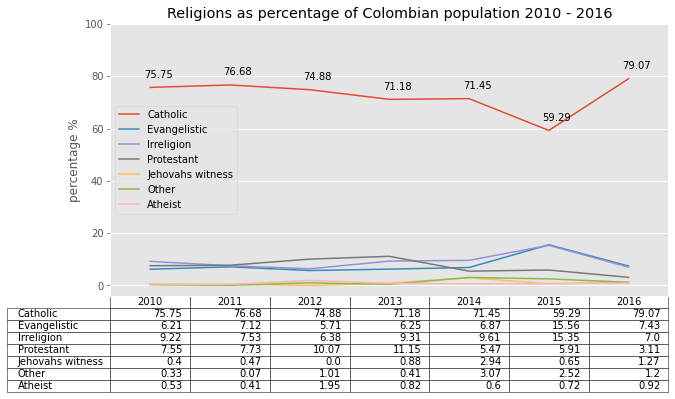

In [192]:
plt.style.use('ggplot')
ax = summary.T.plot(
    table=True, 
    title='Religions as percentage of Colombian population 2010 - 2016',
    figsize=(10,5)
)
ax.get_xaxis().set_visible(False)
ax.set_ylabel("percentage %");


for col in summary.columns:
  ax.annotate(s=str(summary[col]['Catholic']),
              xy=(col, summary[col]['Catholic']),
              textcoords="offset points", # how to position the text
              xytext=(8,10), # distance from text to points (x,y)
              ha='center')
ax.get_xaxis().set_visible(False)
ax.axis(xmin=2009.5,xmax=2016.5, ymax=100);

In [179]:
summary[2016]['Catholic']

# ax.annotate((xy=(summary[2016], row['data_values']))

79.07